In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from plotnine import *
from scipy import stats

/opt/homebrew/anaconda3/envs/deeplearning/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the dataset
path = "../data/gym_members_exercise_tracking.csv"
df_gym = pd.read_csv(path)

In [3]:
# Display the first few rows to understand the dataset structure
display(df_gym.head())

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [18]:
workout_types = df_gym['Workout_Type'].unique()

print(f"The workout types are: {workout_types}")

dict_convert = {
    'Yoga': 'Anaerobic',
    'HIIT': 'Aerobic',
    'Cardio': 'Aerobic',
    'Strength': 'Anaerobic',
}

df_calories = df_gym[['Calories_Burned', 'Workout_Type']].copy(deep=True)

df_calories['Workout_Type'] = df_calories['Workout_Type'].map(dict_convert)

display(df_calories.head()) 



The workout types are: ['Yoga' 'HIIT' 'Cardio' 'Strength']


,Calories_Burned,Workout_Type
0,1313.0,Anaerobic
1,883.0,Aerobic
2,677.0,Aerobic
3,532.0,Anaerobic
4,556.0,Anaerobic


In [19]:
df_calories.groupby('Workout_Type').count()

,Calories_Burned
Workout_Type,
Aerobic,476
Anaerobic,497


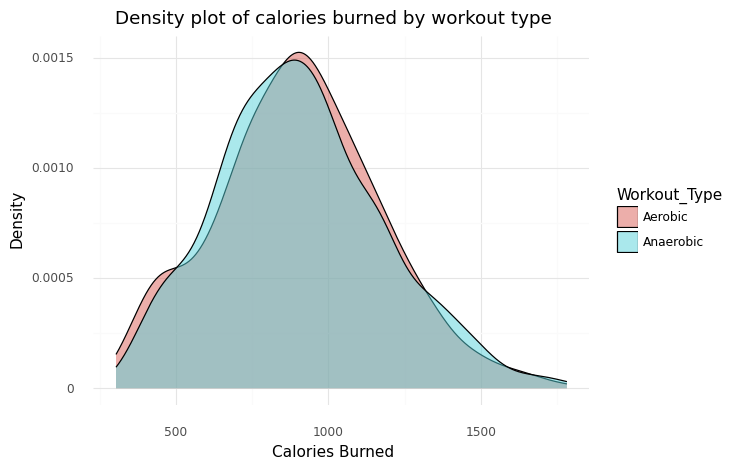

In [20]:
# Plots the distribution of calories burned for each workout type

plot = (
    ggplot(df_calories, aes(x='Calories_Burned', fill='Workout_Type'))
    + geom_density(alpha=0.5)
    + labs(title='Density plot of calories burned by workout type', x='Calories Burned', y='Density')
    + theme_minimal()
)

print(plot)

/opt/homebrew/anaconda3/envs/deeplearning/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 21'. Pick better value with 'binwidth'.
/opt/homebrew/anaconda3/envs/deeplearning/lib/python3.9/site-packages/plotnine/stats/binning.py:152: FutureWarning: The provided callable <function sum at 0x1045638b0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
/opt/homebrew/anaconda3/envs/deeplearning/lib/python3.9/site-packages/plotnine/stats/binning.py:152: FutureWarning: The provided callable <function sum at 0x1045638b0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.


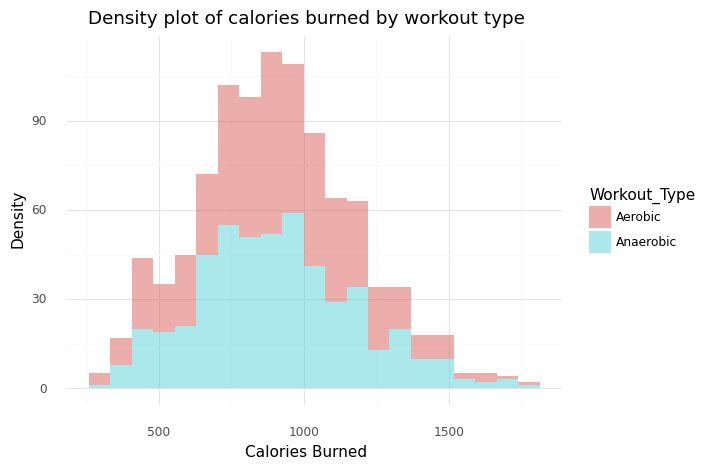

In [21]:
# Plots the distribution of calories burned for each workout type

plot = (
    ggplot(df_calories, aes(x='Calories_Burned', fill='Workout_Type'))
    + geom_histogram(alpha=0.5)
    + labs(title='Density plot of calories burned by workout type', x='Calories Burned', y='Density')
    + theme_minimal()
)

print(plot)

In [22]:
# Test Staticis: diff of avg calories burned between Aerobic and Anaerobic workouts

def calc_test_statistic(df):
    aerobic = df[df['Workout_Type'] == 'Aerobic']['Calories_Burned']
    anaerobic = df[df['Workout_Type'] == 'Anaerobic']['Calories_Burned']
    return np.mean(aerobic) - np.mean(anaerobic)

def perm_test(df, n=1000):
    test_stats = []
    for _ in range(n):
        df['Workout_Type'] = np.random.permutation(df['Workout_Type'].values)
        test_stats.append(calc_test_statistic(df))
    return test_stats

observed_test_statistic = calc_test_statistic(df_calories)

test_stats = perm_test(df_calories)

p_value = np.mean(test_stats > observed_test_statistic)

print(f"The p-value is: {p_value}")

# Test Staticis: diff of avg calories burned between Aerobic and Anaerobic workouts


The p-value is: 0.574


In [24]:
# prints the most calories burned in a single workout sorted 

df_gym.sort_values(by='Calories_Burned', ascending=False).head(20)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
910,32,Male,89.8,1.92,199,168,67,1.93,1783.0,Strength,10.6,3.5,4,3,24.36
712,19,Male,82.4,1.96,174,169,62,1.90,1766.0,HIIT,10.1,3.5,5,3,21.45
511,39,Male,86.2,1.82,191,160,72,1.96,1725.0,Strength,10.2,3.5,5,3,26.02
124,26,Male,86.2,1.68,189,157,72,1.97,1701.0,Strength,13.3,3.5,5,3,30.54
90,25,Male,81.5,1.61,170,159,63,1.93,1688.0,HIIT,10.9,3.5,4,3,31.44
646,22,Male,88.5,1.62,174,162,69,1.88,1675.0,Strength,10.7,3.5,5,3,33.72
572,36,Male,88.0,1.71,185,160,73,1.87,1646.0,HIIT,12.0,3.5,5,3,30.09
728,47,Male,87.2,1.64,177,165,50,2.00,1634.0,Strength,15.0,3.5,4,3,32.42
99,24,Female,60.1,1.79,170,165,63,1.97,1625.0,Cardio,15.9,2.7,4,3,18.76
475,27,Male,89.3,1.64,192,162,64,1.82,1622.0,HIIT,12.1,3.5,4,3,33.20
